download the dataset from : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [5]:
#Image('../input/new-york-city-airbnb-open-data/New_York_City_.png', width=500, height=400)

In [6]:
data = pd.read_csv('AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<AxesSubplot:>

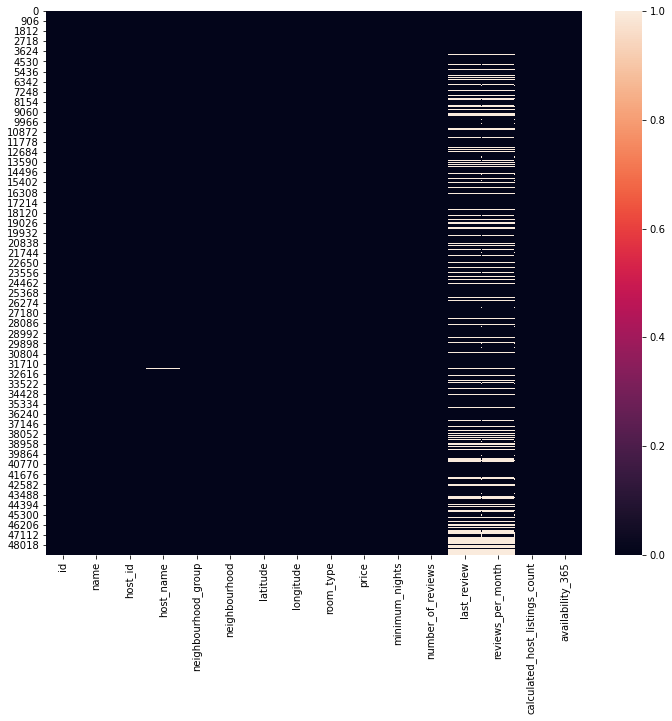

In [8]:
plt.figure(figsize = (12,10))
sns.heatmap(data.isnull())

In [9]:
data.shape

(48895, 16)

In [10]:
for col in data.columns:
    if data[col].isnull().sum()!=0:
        print(f'{col}: {data[col].isnull().sum()}') 

name: 16
host_name: 21
last_review: 10052
reviews_per_month: 10052


In [11]:
def preprocessing_1(df):
    df = df.copy()
    
    drop_cols = ['id', 'name','host_id','host_name']
    df = df.drop(drop_cols, axis = 1)
    return df

In [12]:
df1 = preprocessing_1(data)
df1

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [13]:
for col in df1.columns:
    if df1[col].isnull().sum()!=0:
        print(f'{col}: {df1[col].isnull().sum()}') 

last_review: 10052
reviews_per_month: 10052


### check if both  [last_review, reviews_per_month] has Nans in same place --> can just drop that rows

In [14]:
last_review_nans = df1[df1['last_review'].isnull()]
last_review_nans

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [15]:
reviews_per_month_nans = df1[df1['reviews_per_month'].isnull()]
reviews_per_month_nans

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [16]:
nans_df = pd.concat([last_review_nans,reviews_per_month_nans], axis=0)
nans_df.shape

(20104, 12)

In [17]:
nans_df[nans_df.duplicated()]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


* окшош жерде value жок экен --> Nans rowду drop кылсак экоо тен сразу жок болот

In [18]:
df1 = df1.dropna()

In [19]:
data.shape, df1.shape

((48895, 16), (38843, 12))

In [20]:
df1 = df1.reset_index(drop= True)
df1.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


<AxesSubplot:>

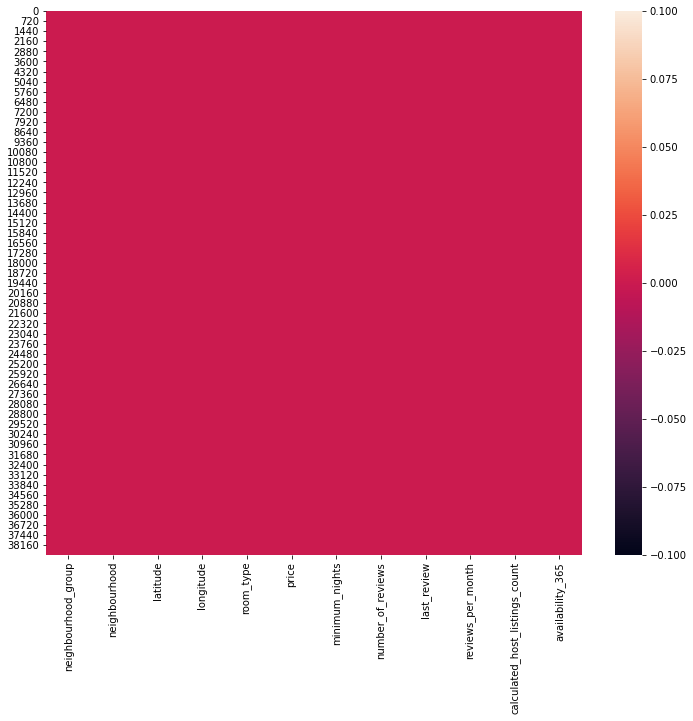

In [21]:
plt.figure(figsize = (12,10))
sns.heatmap(df1.isnull())

In [22]:
for col in df1.columns:
    if df1[col].isnull().sum()!=0:
        print(f'{col}: {df1[col].isnull().sum()}') 

* Nans are 되어쓰

# Data Visualization

In [23]:
df1['neighbourhood_group'].value_counts()

Manhattan        16632
Brooklyn         16447
Queens            4574
Bronx              876
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [24]:
neigb_top_15_labels = df1['neighbourhood'].value_counts()[:10].keys().tolist()

In [25]:
vals = df1['neighbourhood'].value_counts().keys().tolist()
neigb = df1['neighbourhood'].value_counts().values
vals[:5], neigb[:5]

(['Williamsburg',
  'Bedford-Stuyvesant',
  'Harlem',
  'Bushwick',
  "Hell's Kitchen"],
 array([3163, 3141, 2206, 1944, 1532], dtype=int64))

In [26]:
neigb_top_15_labels = df1['neighbourhood'].value_counts()[:15].keys().tolist()
neigb_top_15_labels

['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 'Bushwick',
 "Hell's Kitchen",
 'East Village',
 'Upper West Side',
 'Upper East Side',
 'Crown Heights',
 'Midtown',
 'East Harlem',
 'Greenpoint',
 'Chelsea',
 'Lower East Side',
 'Washington Heights']

([<matplotlib.patches.Wedge at 0x298adf8b550>,
 [Text(1.0925621934054306, 0.12770220648491118, 'Williamsburg'),
  Text(1.0336618818860421, 0.3762221603465248, 'Bedford-Stuyvesant'),
  Text(0.9190365899341553, 0.604459879861517, 'Harlem'),
  Text(0.6568744447537899, 0.8823355165861797, 'Bushwick'),
  Text(0.19101298416420226, 1.083288530300532, "Hell's Kitchen"),
  Text(-0.31548357059890975, 1.0537884591710818, 'East Village'),
  Text(-0.7548658155281622, 0.8001109926422725, 'Upper West Side'),
  Text(-1.0336618906921569, 0.3762221361519225, 'Upper East Side'),
  Text(-1.0925621904163443, -0.12770223205817466, 'Crown Heights'),
  Text(-0.9190365757857505, -0.6044599013731207, 'Midtown'),
  Text(-0.5499999702695119, -0.9526279613277874, 'East Harlem'),
  Text(-0.06395927372182296, -1.0981389763162843, 'Greenpoint'),
  Text(0.43568778117018736, -1.0100377009493255, 'Chelsea'),
  Text(0.8426489168532442, -0.7070663355909788, 'Lower East Side'),
  Text(1.070349369073471, -0.253677409565817,

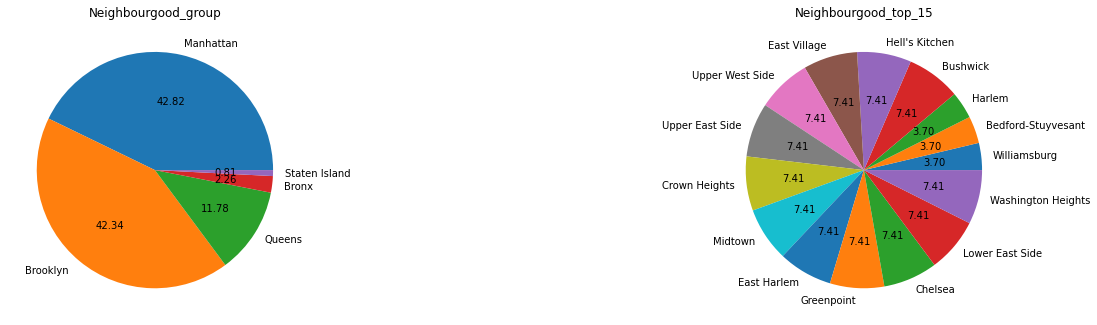

In [27]:
plt.figure(figsize = (18,12))
plt.subplot(1,3,1)
plt.title('Neighbourgood_group')
plt.pie(df1['neighbourhood_group'].value_counts(), 
        labels = ['Manhattan','Brooklyn ','Queens','Bronx ','Staten Island'],autopct='%.2f')

plt.subplot(1,3,3)
plt.title('Neighbourgood_top_15')

plt.pie(sorted(df1['neighbourhood'].value_counts())[:15], 
        labels = neigb_top_15_labels,autopct='%.2f', )

In [28]:
df1.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [29]:
pd.pivot_table(df1, index = ['neighbourhood_group','neighbourhood'], values = 'price')

price
neighbourhood_group neighbourhood            
Bronx               Allerton        90.594595
                    Baychester      78.000000
                    Belmont         79.450000
                    Bronxdale       51.875000
                    Castle Hill     74.000000
...                                       ...
Staten Island       Tompkinsville   77.250000
                    Tottenville    160.800000
                    West Brighton   66.250000
                    Westerleigh     71.500000
                    Willowbrook    249.000000

[218 rows x 1 columns]

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

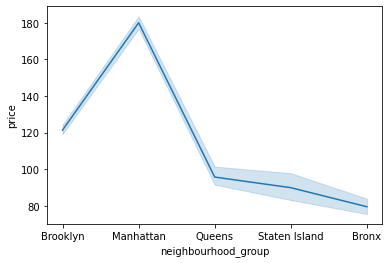

In [70]:
plt.figure(figsize=(6,4))
sns.lineplot(data = df1, x = 'neighbourhood_group',y='price',)

# change object > numeric

In [31]:
obj_cols = df1.select_dtypes('object').columns
[print(f'{col}: {df1[col].isnull().sum()}') for col in obj_cols]

print('\n\n object column unique len \n')

[print(f'{col}: {len(df1[col].unique())}') for col in obj_cols]

neighbourhood_group: 0
neighbourhood: 0
room_type: 0
last_review: 0


 object column unique len 

neighbourhood_group: 5
neighbourhood: 218
room_type: 3
last_review: 1764


[None, None, None, None]

In [32]:
# def encode_funct(df):
#     df = df.copy()
    
#     neigbourhood_value_encode = df['neighbourhood_group'].value_counts().keys().tolist()
#     lenth = len(neigbourhood_value_encode)
#     range_lenth = np.arange(lenth)
    
#     for i, data in enumerate(df['neighbourhood_group']):
#         for j, n in enumerate(neigbourhood_value_encode):
#             if data == n:
#                 df.loc[i, 'neighbourhood_group'] = range_lenth[j]
                
    
#     return df

In [33]:
list(set(df1['neighbourhood_group']))

['Queens', 'Bronx', 'Staten Island', 'Brooklyn', 'Manhattan']

## Making  Label Encode function

In [34]:
def encode_funct(df, col, classes_ = False):
    df = df.copy()
    
    #value_to_be_encoded = df[col].value_counts().keys().tolist()   ==
    value_to_be_encoded = list(set(df1[col]))  # 몇개로 classification을 해야 할지 ex: list(set(df1['neighbourhood_group'])) => ['Queens', 'Bronx', 'Manhattan', 'Brooklyn', 'Staten Island']
    lenth = len(value_to_be_encoded)  #  5
    range_lenth = np.arange(lenth)     # 0, 1, 2, 3, 4
    
    
 
    # encode
    
    for i, data in enumerate(df[col]):
        for j, n in enumerate(value_to_be_encoded):
            if data == n:
                
                df.loc[i,col] = int(range_lenth[j])
               # print(type(df.loc[i,col]))
         
       
    # know which value is converted into what kind of number
    
    classes = dict()
    for i, cl in enumerate(value_to_be_encoded):
        classes[cl] = range_lenth[i]
        
    if classes_ == True:
        return df[col], classes
    
    else: return df[col]

# Encode categorical features

In [35]:
neighbourhood_group_encoded, neighbourhood_group_classes_ = encode_funct(df1, 'neighbourhood_group',  classes_ = True)

In [36]:
neighbourhood_encoded, neighbourhood_classes_ = encode_funct(df1, 'neighbourhood',  classes_ = True)

In [37]:
room_type_encoded, room_type_classes_ = encode_funct(df1, 'room_type', classes_  = True)

#### encoded features are object type --> change to int

In [38]:
neighbourhood_group_encoded = neighbourhood_group_encoded.astype(dtype= int)
neighbourhood_encoded = neighbourhood_encoded.astype(dtype = int)
room_type_encoded = room_type_encoded.astype(dtype = int)

In [39]:
print('[ENCODED CLASSES_]: ',neighbourhood_group_classes_,neighbourhood_classes_, room_type_classes_, sep = '\n \n')

[ENCODED CLASSES_]: 
 
{'Queens': 0, 'Bronx': 1, 'Staten Island': 2, 'Brooklyn': 3, 'Manhattan': 4}
 
{'Glendale': 0, 'Chelsea': 1, 'Concourse Village': 2, 'Soundview': 3, 'Todt Hill': 4, 'West Brighton': 5, 'Bedford-Stuyvesant': 6, 'Rossville': 7, 'Theater District': 8, "Hell's Kitchen": 9, 'Civic Center': 10, 'Flatiron District': 11, 'Rockaway Beach': 12, 'Woodside': 13, 'Melrose': 14, 'Grant City': 15, 'Flatlands': 16, 'Greenpoint': 17, 'Upper East Side': 18, 'NoHo': 19, 'Battery Park City': 20, 'Nolita': 21, 'Port Morris': 22, 'Inwood': 23, 'Jamaica': 24, 'Stuyvesant Town': 25, 'Forest Hills': 26, 'Woodlawn': 27, 'Brownsville': 28, 'Arrochar': 29, 'Pelham Gardens': 30, 'Mount Eden': 31, 'Bay Terrace': 32, 'Bellerose': 33, 'Silver Lake': 34, 'Queens Village': 35, 'Brighton Beach': 36, 'Bushwick': 37, 'Morningside Heights': 38, 'West Village': 39, 'Sunnyside': 40, 'Castleton Corners': 41, 'Fort Greene': 42, 'Prospect-Lefferts Gardens': 43, 'Washington Heights': 44, 'Cypress Hills': 4

In [40]:
df2 = df1.copy()
df2

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...
38838,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
38839,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
38840,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
38841,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [41]:
df2['neighbourhood_group'] = neighbourhood_group_encoded
df2['neighbourhood'] = neighbourhood_encoded
df2['room_type'] = room_type_encoded

In [42]:
neighbourhood_group_encoded

0        3
1        4
2        3
3        4
4        4
        ..
38838    4
38839    0
38840    2
38841    1
38842    3
Name: neighbourhood_group, Length: 38843, dtype: int32

In [43]:
df2

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3,80,40.64749,-73.97237,2,149,1,9,2018-10-19,0.21,6,365
1,4,201,40.75362,-73.98377,1,225,1,45,2019-05-21,0.38,2,355
2,3,82,40.68514,-73.95976,1,89,1,270,2019-07-05,4.64,1,194
3,4,76,40.79851,-73.94399,1,80,10,9,2018-11-19,0.10,1,0
4,4,135,40.74767,-73.97500,1,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...
38838,4,18,40.78099,-73.95366,2,129,1,1,2019-07-07,1.00,1,147
38839,0,88,40.75104,-73.81459,2,45,1,1,2019-07-07,1.00,6,339
38840,2,209,40.54179,-74.14275,2,235,1,1,2019-07-07,1.00,1,87
38841,1,215,40.80787,-73.92400,1,100,1,2,2019-07-07,2.00,1,40


### last_review --> separate year & month

In [44]:
df3 = df2.copy()
df3['last_review_year'] = pd.DatetimeIndex(df3['last_review']).year
df3['last_review_month'] = pd.DatetimeIndex(df3['last_review']).month
df3.drop('last_review', axis = 1, inplace = True)

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38843 entries, 0 to 38842
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38843 non-null  int32  
 1   neighbourhood                   38843 non-null  int32  
 2   latitude                        38843 non-null  float64
 3   longitude                       38843 non-null  float64
 4   room_type                       38843 non-null  int32  
 5   price                           38843 non-null  int64  
 6   minimum_nights                  38843 non-null  int64  
 7   number_of_reviews               38843 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  38843 non-null  int64  
 10  availability_365                38843 non-null  int64  
 11  last_review_year                38843 non-null  int64  
 12  last_review_month               

* object>> numerical
* correlation
* model

In [46]:
df3.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,3,80,40.64749,-73.97237,2,149,1,9,0.21,6,365,2018,10
1,4,201,40.75362,-73.98377,1,225,1,45,0.38,2,355,2019,5
2,3,82,40.68514,-73.95976,1,89,1,270,4.64,1,194,2019,7


### normalization

In [47]:
def preprocess_final(ds, scaler = False):
    ds = ds.copy()
    
    X = ds.drop(['price'], axis = 1)
    y = ds.price
    
    if scaler:
        X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
    
    
    return X,y

C:\Users\k\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\k\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\k\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\k\Anaconda\lib\site-packages\seaborn\

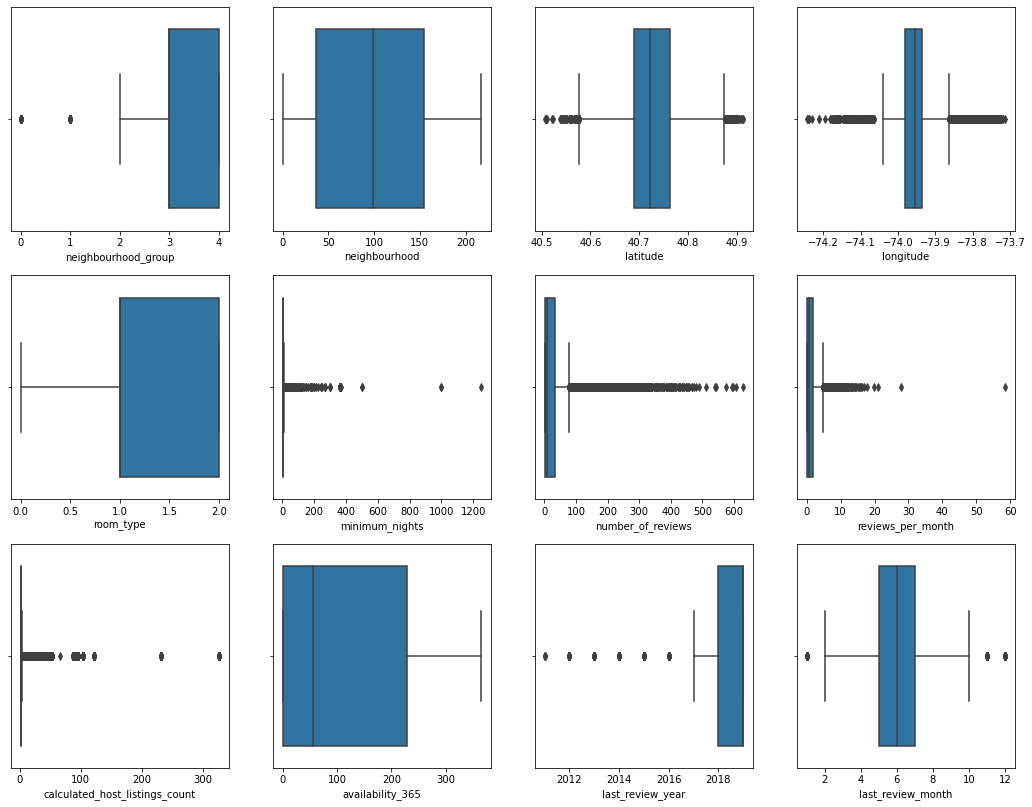

In [49]:
# Without scaling

X,y = preprocess_final(df3,)
plt.figure(figsize = (18,14))

for i, col in enumerate(X.columns):
    
    plt.subplot(3,4, i+1)
    sns.boxplot(X[col])

In [50]:
X,y = preprocess_final(df3, scaler = StandardScaler())

C:\Users\k\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\k\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\k\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\k\Anaconda\lib\site-packages\seaborn\

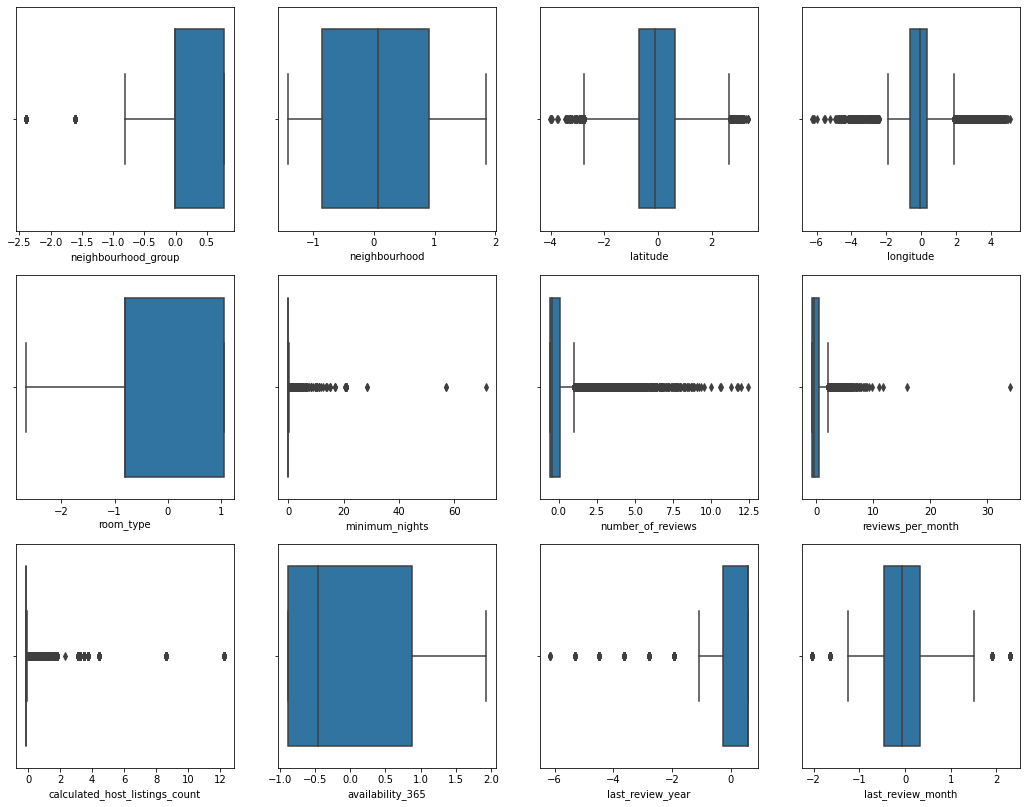

In [51]:
# With standard scaling

plt.figure(figsize = (18,14))

for i, col in enumerate(X.columns):
    
    plt.subplot(3,4, i+1)
    sns.boxplot(X[col])

C:\Users\k\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\k\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\k\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\k\Anaconda\lib\site-packages\seaborn\

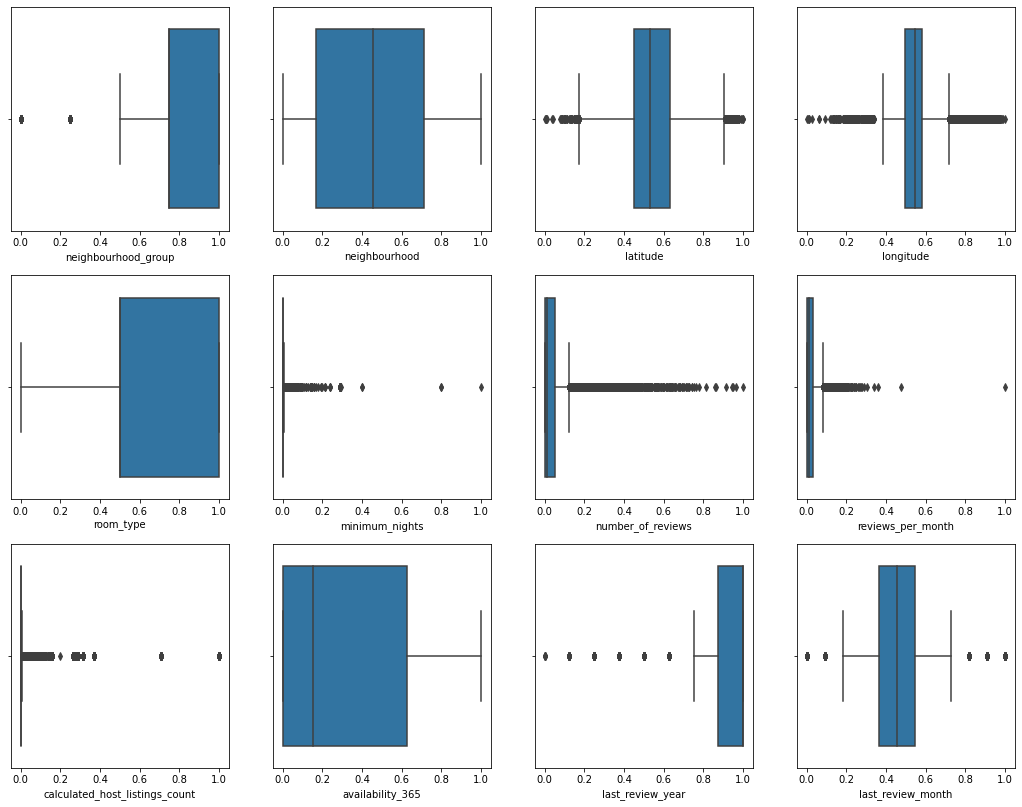

In [52]:
X,y = preprocess_final(df3, scaler = MinMaxScaler())

# With MinMax scaling

plt.figure(figsize = (18,14))

for i, col in enumerate(X.columns):
    
    plt.subplot(3,4, i+1)
    sns.boxplot(X[col])

# Train test # regression problem

### 1. without scaling

In [53]:
X,y = preprocess_final(df3)

X_train, X_test,  y_train,y_test = train_test_split(X,y, train_size = 0.8, random_state = 2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31074, 12), (31074,), (7769, 12), (7769,))

In [54]:
models = {
    '                    Linear Regression': LinearRegression(),
    '                  KNeighborsRegressor':KNeighborsRegressor(n_neighbors=10),
    'Linear Regression (L2 Regularization)': Ridge(),
    'Linear Regression (L! Regularization)': Lasso(),
    '                       Neural Network': MLPRegressor(),
    'Support Vector Machine(Linear Kernel)': LinearSVR(),
    '   Support Vector Machine(RBF Kernel)': SVR(),
    '                        Decision Tree': DecisionTreeRegressor(),
    '                        Random Forest': RandomForestRegressor(),
    '                    Gradient Boosting': GradientBoostingRegressor(),
    '                              XGBoost': XGBRegressor(),
    '                             LightGBM': LGBMRegressor(),
    '                             CatBoost': CatBoostRegressor(),
    
}

In [55]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print('%s trained '%name)

                    Linear Regression trained 
                  KNeighborsRegressor trained 
Linear Regression (L2 Regularization) trained 
Linear Regression (L! Regularization) trained 
                       Neural Network trained 


C:\Users\k\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Support Vector Machine(Linear Kernel) trained 
   Support Vector Machine(RBF Kernel) trained 
                        Decision Tree trained 
                        Random Forest trained 
                    Gradient Boosting trained 
                              XGBoost trained 
                             LightGBM trained 
Learning rate set to 0.070466
0:	learn: 183.0298035	total: 193ms	remaining: 3m 12s
1:	learn: 181.2390928	total: 218ms	remaining: 1m 48s
2:	learn: 179.5253005	total: 243ms	remaining: 1m 20s
3:	learn: 177.9345162	total: 266ms	remaining: 1m 6s
4:	learn: 176.5923562	total: 282ms	remaining: 56.2s
5:	learn: 175.2497187	total: 294ms	remaining: 48.7s
6:	learn: 174.0689303	total: 307ms	remaining: 43.6s
7:	learn: 173.0800151	total: 321ms	remaining: 39.8s
8:	learn: 172.1197319	total: 333ms	remaining: 36.7s
9:	learn: 171.4600334	total: 347ms	remaining: 34.3s
10:	learn: 170.6810698	total: 359ms	remaining: 32.3s
11:	learn: 169.7889592	total: 372ms	remaining: 30.7s
12:	learn: 1

158:	learn: 144.0340813	total: 2.33s	remaining: 12.3s
159:	learn: 143.8274455	total: 2.35s	remaining: 12.3s
160:	learn: 143.7831193	total: 2.36s	remaining: 12.3s
161:	learn: 143.6580089	total: 2.37s	remaining: 12.2s
162:	learn: 143.6211562	total: 2.38s	remaining: 12.2s
163:	learn: 143.2259330	total: 2.39s	remaining: 12.2s
164:	learn: 142.8292923	total: 2.4s	remaining: 12.2s
165:	learn: 142.6324003	total: 2.42s	remaining: 12.1s
166:	learn: 142.5980198	total: 2.43s	remaining: 12.1s
167:	learn: 142.5095442	total: 2.44s	remaining: 12.1s
168:	learn: 142.4382800	total: 2.45s	remaining: 12.1s
169:	learn: 142.2475409	total: 2.47s	remaining: 12s
170:	learn: 142.1773269	total: 2.48s	remaining: 12s
171:	learn: 142.1370423	total: 2.49s	remaining: 12s
172:	learn: 141.9528577	total: 2.5s	remaining: 12s
173:	learn: 141.9098309	total: 2.52s	remaining: 11.9s
174:	learn: 141.8791671	total: 2.53s	remaining: 11.9s
175:	learn: 141.7120203	total: 2.54s	remaining: 11.9s
176:	learn: 141.6824615	total: 2.55s	r

316:	learn: 125.4057863	total: 4.29s	remaining: 9.24s
317:	learn: 125.2598188	total: 4.3s	remaining: 9.23s
318:	learn: 125.1766032	total: 4.31s	remaining: 9.21s
319:	learn: 125.0968295	total: 4.33s	remaining: 9.19s
320:	learn: 124.9767074	total: 4.34s	remaining: 9.18s
321:	learn: 124.9171131	total: 4.35s	remaining: 9.16s
322:	learn: 124.8859067	total: 4.36s	remaining: 9.14s
323:	learn: 124.8301006	total: 4.38s	remaining: 9.13s
324:	learn: 124.6842496	total: 4.39s	remaining: 9.11s
325:	learn: 124.5677093	total: 4.4s	remaining: 9.1s
326:	learn: 124.5139138	total: 4.41s	remaining: 9.08s
327:	learn: 124.3730052	total: 4.42s	remaining: 9.06s
328:	learn: 124.2924106	total: 4.44s	remaining: 9.05s
329:	learn: 124.2405491	total: 4.45s	remaining: 9.03s
330:	learn: 124.1279777	total: 4.46s	remaining: 9.02s
331:	learn: 123.9953569	total: 4.47s	remaining: 9s
332:	learn: 123.9281837	total: 4.49s	remaining: 8.99s
333:	learn: 123.7964168	total: 4.5s	remaining: 8.97s
334:	learn: 123.6727159	total: 4.51

470:	learn: 114.7201433	total: 6.21s	remaining: 6.98s
471:	learn: 114.6964822	total: 6.22s	remaining: 6.96s
472:	learn: 114.5983928	total: 6.24s	remaining: 6.95s
473:	learn: 114.5485133	total: 6.25s	remaining: 6.93s
474:	learn: 114.4885720	total: 6.26s	remaining: 6.92s
475:	learn: 114.4403989	total: 6.28s	remaining: 6.91s
476:	learn: 114.3901925	total: 6.29s	remaining: 6.89s
477:	learn: 114.3539090	total: 6.3s	remaining: 6.88s
478:	learn: 114.3232772	total: 6.32s	remaining: 6.87s
479:	learn: 114.2767285	total: 6.33s	remaining: 6.86s
480:	learn: 114.1802613	total: 6.34s	remaining: 6.84s
481:	learn: 114.1586357	total: 6.35s	remaining: 6.83s
482:	learn: 114.1257568	total: 6.37s	remaining: 6.82s
483:	learn: 114.0295227	total: 6.38s	remaining: 6.8s
484:	learn: 113.9417307	total: 6.39s	remaining: 6.79s
485:	learn: 113.9157097	total: 6.41s	remaining: 6.78s
486:	learn: 113.8956153	total: 6.42s	remaining: 6.76s
487:	learn: 113.8698634	total: 6.43s	remaining: 6.75s
488:	learn: 113.8149362	total:

625:	learn: 108.4084106	total: 8.18s	remaining: 4.88s
626:	learn: 108.3608301	total: 8.19s	remaining: 4.87s
627:	learn: 108.3198042	total: 8.2s	remaining: 4.86s
628:	learn: 108.2932254	total: 8.21s	remaining: 4.84s
629:	learn: 108.2795434	total: 8.23s	remaining: 4.83s
630:	learn: 108.2343978	total: 8.24s	remaining: 4.82s
631:	learn: 108.2240589	total: 8.25s	remaining: 4.8s
632:	learn: 108.1776726	total: 8.26s	remaining: 4.79s
633:	learn: 108.1691428	total: 8.28s	remaining: 4.78s
634:	learn: 108.1143987	total: 8.29s	remaining: 4.76s
635:	learn: 108.0588723	total: 8.3s	remaining: 4.75s
636:	learn: 108.0505561	total: 8.31s	remaining: 4.74s
637:	learn: 108.0426634	total: 8.32s	remaining: 4.72s
638:	learn: 108.0299965	total: 8.34s	remaining: 4.71s
639:	learn: 108.0162841	total: 8.35s	remaining: 4.7s
640:	learn: 107.9683983	total: 8.36s	remaining: 4.68s
641:	learn: 107.9401303	total: 8.38s	remaining: 4.67s
642:	learn: 107.9317307	total: 8.39s	remaining: 4.66s
643:	learn: 107.9096717	total: 8

781:	learn: 104.5312567	total: 10.1s	remaining: 2.83s
782:	learn: 104.5110162	total: 10.1s	remaining: 2.81s
783:	learn: 104.4775459	total: 10.2s	remaining: 2.8s
784:	learn: 104.4671173	total: 10.2s	remaining: 2.79s
785:	learn: 104.4483057	total: 10.2s	remaining: 2.77s
786:	learn: 104.4119646	total: 10.2s	remaining: 2.76s
787:	learn: 104.3925571	total: 10.2s	remaining: 2.75s
788:	learn: 104.3673037	total: 10.2s	remaining: 2.73s
789:	learn: 104.3311405	total: 10.2s	remaining: 2.72s
790:	learn: 104.3118104	total: 10.3s	remaining: 2.71s
791:	learn: 104.2818704	total: 10.3s	remaining: 2.69s
792:	learn: 104.2738909	total: 10.3s	remaining: 2.68s
793:	learn: 104.2566034	total: 10.3s	remaining: 2.67s
794:	learn: 104.2384141	total: 10.3s	remaining: 2.66s
795:	learn: 104.2292734	total: 10.3s	remaining: 2.64s
796:	learn: 104.1766598	total: 10.3s	remaining: 2.63s
797:	learn: 104.1522985	total: 10.3s	remaining: 2.62s
798:	learn: 104.1221454	total: 10.3s	remaining: 2.6s
799:	learn: 104.0844854	total:

935:	learn: 100.4052381	total: 12.1s	remaining: 827ms
936:	learn: 100.3645824	total: 12.1s	remaining: 814ms
937:	learn: 100.3070955	total: 12.1s	remaining: 801ms
938:	learn: 100.2939304	total: 12.1s	remaining: 788ms
939:	learn: 100.2921252	total: 12.1s	remaining: 775ms
940:	learn: 100.2704964	total: 12.1s	remaining: 762ms
941:	learn: 100.2649243	total: 12.2s	remaining: 749ms
942:	learn: 100.2352432	total: 12.2s	remaining: 736ms
943:	learn: 100.2021228	total: 12.2s	remaining: 723ms
944:	learn: 100.1793075	total: 12.2s	remaining: 710ms
945:	learn: 100.1772263	total: 12.2s	remaining: 697ms
946:	learn: 100.1660447	total: 12.2s	remaining: 684ms
947:	learn: 100.1407676	total: 12.2s	remaining: 671ms
948:	learn: 100.1346406	total: 12.3s	remaining: 658ms
949:	learn: 100.1293421	total: 12.3s	remaining: 645ms
950:	learn: 100.0882137	total: 12.3s	remaining: 633ms
951:	learn: 100.0641047	total: 12.3s	remaining: 620ms
952:	learn: 100.0590014	total: 12.3s	remaining: 607ms
953:	learn: 100.0266828	tota

In [56]:
from sklearn.metrics import r2_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print('%s accuracy: %.2f'%(name, score*100))

                    Linear Regression accuracy: 5.54
                  KNeighborsRegressor accuracy: 1.48
Linear Regression (L2 Regularization) accuracy: 5.54
Linear Regression (L! Regularization) accuracy: 5.15
                       Neural Network accuracy: 6.26
Support Vector Machine(Linear Kernel) accuracy: -23.85
   Support Vector Machine(RBF Kernel) accuracy: -2.57
                        Decision Tree accuracy: -29.06
                        Random Forest accuracy: 24.08
                    Gradient Boosting accuracy: 11.41
                              XGBoost accuracy: 11.00
                             LightGBM accuracy: 17.96
                             CatBoost accuracy: 15.11


### 2. Standard Scaling

In [58]:
X,y = preprocess_final(df3, StandardScaler())

X_train, X_test,  y_train,y_test = train_test_split(X,y, train_size = 0.8, random_state = 2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31074, 12), (31074,), (7769, 12), (7769,))

In [59]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print('%s trained '%name)

                    Linear Regression trained 
                  KNeighborsRegressor trained 
Linear Regression (L2 Regularization) trained 
Linear Regression (L! Regularization) trained 


C:\Users\k\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                       Neural Network trained 
Support Vector Machine(Linear Kernel) trained 
   Support Vector Machine(RBF Kernel) trained 
                        Decision Tree trained 
                        Random Forest trained 
                    Gradient Boosting trained 
                              XGBoost trained 
                             LightGBM trained 
Learning rate set to 0.070466
0:	learn: 183.0298035	total: 14.7ms	remaining: 14.7s
1:	learn: 181.2390928	total: 28.1ms	remaining: 14s
2:	learn: 179.5253005	total: 41.1ms	remaining: 13.7s
3:	learn: 177.9345162	total: 54.3ms	remaining: 13.5s
4:	learn: 176.5923562	total: 67.6ms	remaining: 13.5s
5:	learn: 175.2497187	total: 80.5ms	remaining: 13.3s
6:	learn: 174.0689303	total: 93.6ms	remaining: 13.3s
7:	learn: 173.0800151	total: 107ms	remaining: 13.3s
8:	learn: 172.1197319	total: 120ms	remaining: 13.2s
9:	learn: 171.4600334	total: 133ms	remaining: 13.2s
10:	learn: 170.6810698	total: 147ms	remaining: 13.2s
11:	learn: 169.7

149:	learn: 144.1917952	total: 1.91s	remaining: 10.8s
150:	learn: 144.1008980	total: 1.92s	remaining: 10.8s
151:	learn: 144.0556732	total: 1.93s	remaining: 10.8s
152:	learn: 143.9288561	total: 1.95s	remaining: 10.8s
153:	learn: 143.8361818	total: 1.96s	remaining: 10.8s
154:	learn: 143.8018841	total: 1.97s	remaining: 10.8s
155:	learn: 143.7146845	total: 1.98s	remaining: 10.7s
156:	learn: 143.5362509	total: 2s	remaining: 10.7s
157:	learn: 143.4930822	total: 2.01s	remaining: 10.7s
158:	learn: 143.3297600	total: 2.02s	remaining: 10.7s
159:	learn: 143.1385477	total: 2.03s	remaining: 10.7s
160:	learn: 143.1050715	total: 2.05s	remaining: 10.7s
161:	learn: 142.8981862	total: 2.06s	remaining: 10.7s
162:	learn: 142.7138648	total: 2.07s	remaining: 10.6s
163:	learn: 142.5404189	total: 2.09s	remaining: 10.6s
164:	learn: 142.5003370	total: 2.1s	remaining: 10.6s
165:	learn: 142.4749150	total: 2.11s	remaining: 10.6s
166:	learn: 142.4370998	total: 2.12s	remaining: 10.6s
167:	learn: 142.4007174	total: 2

305:	learn: 127.8680196	total: 3.85s	remaining: 8.73s
306:	learn: 127.8314682	total: 3.86s	remaining: 8.71s
307:	learn: 127.7431953	total: 3.87s	remaining: 8.7s
308:	learn: 127.6533241	total: 3.88s	remaining: 8.68s
309:	learn: 127.6403736	total: 3.9s	remaining: 8.67s
310:	learn: 127.4387405	total: 3.91s	remaining: 8.66s
311:	learn: 127.4055209	total: 3.92s	remaining: 8.64s
312:	learn: 127.3367307	total: 3.93s	remaining: 8.63s
313:	learn: 127.2499287	total: 3.94s	remaining: 8.62s
314:	learn: 127.1661270	total: 3.96s	remaining: 8.6s
315:	learn: 127.0768822	total: 3.97s	remaining: 8.59s
316:	learn: 126.9909943	total: 3.98s	remaining: 8.58s
317:	learn: 126.9062670	total: 3.99s	remaining: 8.56s
318:	learn: 126.6534768	total: 4s	remaining: 8.55s
319:	learn: 126.5722035	total: 4.02s	remaining: 8.54s
320:	learn: 126.4937413	total: 4.03s	remaining: 8.53s
321:	learn: 126.2497557	total: 4.04s	remaining: 8.52s
322:	learn: 126.2035930	total: 4.06s	remaining: 8.5s
323:	learn: 126.1914190	total: 4.07

464:	learn: 114.8804297	total: 5.79s	remaining: 6.66s
465:	learn: 114.8534674	total: 5.8s	remaining: 6.65s
466:	learn: 114.7495791	total: 5.81s	remaining: 6.63s
467:	learn: 114.7035871	total: 5.83s	remaining: 6.62s
468:	learn: 114.6577722	total: 5.84s	remaining: 6.61s
469:	learn: 114.6503625	total: 5.85s	remaining: 6.6s
470:	learn: 114.6381820	total: 5.86s	remaining: 6.58s
471:	learn: 114.6265451	total: 5.87s	remaining: 6.57s
472:	learn: 114.5724366	total: 5.89s	remaining: 6.56s
473:	learn: 114.5282159	total: 5.9s	remaining: 6.54s
474:	learn: 114.5134682	total: 5.91s	remaining: 6.53s
475:	learn: 114.4229616	total: 5.92s	remaining: 6.52s
476:	learn: 114.3825331	total: 5.94s	remaining: 6.51s
477:	learn: 114.3534327	total: 5.95s	remaining: 6.5s
478:	learn: 114.2852291	total: 5.96s	remaining: 6.49s
479:	learn: 114.2328811	total: 5.98s	remaining: 6.47s
480:	learn: 114.1765249	total: 5.99s	remaining: 6.46s
481:	learn: 114.1447974	total: 6s	remaining: 6.45s
482:	learn: 114.0810673	total: 6.01

618:	learn: 109.0550300	total: 7.73s	remaining: 4.75s
619:	learn: 109.0457801	total: 7.74s	remaining: 4.74s
620:	learn: 109.0344015	total: 7.75s	remaining: 4.73s
621:	learn: 109.0221759	total: 7.77s	remaining: 4.72s
622:	learn: 109.0008692	total: 7.79s	remaining: 4.71s
623:	learn: 108.9975967	total: 7.8s	remaining: 4.7s
624:	learn: 108.9544223	total: 7.82s	remaining: 4.69s
625:	learn: 108.9259823	total: 7.83s	remaining: 4.68s
626:	learn: 108.9027308	total: 7.84s	remaining: 4.67s
627:	learn: 108.8861659	total: 7.86s	remaining: 4.66s
628:	learn: 108.8637322	total: 7.87s	remaining: 4.64s
629:	learn: 108.8154813	total: 7.88s	remaining: 4.63s
630:	learn: 108.7646627	total: 7.9s	remaining: 4.62s
631:	learn: 108.7074326	total: 7.91s	remaining: 4.61s
632:	learn: 108.6686606	total: 7.92s	remaining: 4.59s
633:	learn: 108.6350595	total: 7.94s	remaining: 4.58s
634:	learn: 108.6079957	total: 7.95s	remaining: 4.57s
635:	learn: 108.5880959	total: 7.96s	remaining: 4.55s
636:	learn: 108.5852298	total: 

784:	learn: 104.0656938	total: 9.85s	remaining: 2.7s
785:	learn: 104.0503542	total: 9.86s	remaining: 2.68s
786:	learn: 104.0368148	total: 9.87s	remaining: 2.67s
787:	learn: 104.0188865	total: 9.88s	remaining: 2.66s
788:	learn: 103.9975615	total: 9.9s	remaining: 2.65s
789:	learn: 103.9648213	total: 9.91s	remaining: 2.63s
790:	learn: 103.9628860	total: 9.92s	remaining: 2.62s
791:	learn: 103.9459920	total: 9.93s	remaining: 2.61s
792:	learn: 103.9296438	total: 9.95s	remaining: 2.6s
793:	learn: 103.9158360	total: 9.96s	remaining: 2.58s
794:	learn: 103.8995542	total: 9.97s	remaining: 2.57s
795:	learn: 103.8705476	total: 9.99s	remaining: 2.56s
796:	learn: 103.8548100	total: 10s	remaining: 2.55s
797:	learn: 103.8280556	total: 10s	remaining: 2.53s
798:	learn: 103.8232025	total: 10s	remaining: 2.52s
799:	learn: 103.7874551	total: 10s	remaining: 2.51s
800:	learn: 103.7855047	total: 10s	remaining: 2.5s
801:	learn: 103.7585442	total: 10.1s	remaining: 2.48s
802:	learn: 103.7384286	total: 10.1s	remai

940:	learn: 100.0791255	total: 11.8s	remaining: 740ms
941:	learn: 100.0713107	total: 11.8s	remaining: 728ms
942:	learn: 99.9990703	total: 11.8s	remaining: 715ms
943:	learn: 99.9908681	total: 11.8s	remaining: 703ms
944:	learn: 99.9856888	total: 11.9s	remaining: 690ms
945:	learn: 99.9567205	total: 11.9s	remaining: 678ms
946:	learn: 99.9204866	total: 11.9s	remaining: 665ms
947:	learn: 99.8857399	total: 11.9s	remaining: 652ms
948:	learn: 99.8345515	total: 11.9s	remaining: 640ms
949:	learn: 99.8196993	total: 11.9s	remaining: 627ms
950:	learn: 99.8121849	total: 11.9s	remaining: 615ms
951:	learn: 99.8001563	total: 11.9s	remaining: 602ms
952:	learn: 99.7606704	total: 12s	remaining: 590ms
953:	learn: 99.6914691	total: 12s	remaining: 577ms
954:	learn: 99.6863465	total: 12s	remaining: 565ms
955:	learn: 99.6728650	total: 12s	remaining: 552ms
956:	learn: 99.6358812	total: 12s	remaining: 540ms
957:	learn: 99.6307166	total: 12s	remaining: 527ms
958:	learn: 99.5906287	total: 12s	remaining: 515ms
959:	

In [61]:
from sklearn.metrics import r2_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print('%s accuracy: %.2f '%(name, score*100)+' %')

                    Linear Regression accuracy: 5.54  %
                  KNeighborsRegressor accuracy: 12.66  %
Linear Regression (L2 Regularization) accuracy: 5.54  %
Linear Regression (L! Regularization) accuracy: 5.57  %
                       Neural Network accuracy: 10.69  %
Support Vector Machine(Linear Kernel) accuracy: 3.75  %
   Support Vector Machine(RBF Kernel) accuracy: 6.55  %
                        Decision Tree accuracy: -29.49  %
                        Random Forest accuracy: 21.30  %
                    Gradient Boosting accuracy: 11.42  %
                              XGBoost accuracy: 10.92  %
                             LightGBM accuracy: 17.54  %
                             CatBoost accuracy: 15.78  %


# 3. MinMax Scaling

In [62]:
X,y = preprocess_final(df3, MinMaxScaler())

X_train, X_test,  y_train,y_test = train_test_split(X,y, train_size = 0.8, random_state = 2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31074, 12), (31074,), (7769, 12), (7769,))

In [63]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print('%s trained '%name)

                    Linear Regression trained 
                  KNeighborsRegressor trained 
Linear Regression (L2 Regularization) trained 
Linear Regression (L! Regularization) trained 


C:\Users\k\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                       Neural Network trained 
Support Vector Machine(Linear Kernel) trained 
   Support Vector Machine(RBF Kernel) trained 
                        Decision Tree trained 
                        Random Forest trained 
                    Gradient Boosting trained 
                              XGBoost trained 
                             LightGBM trained 
Learning rate set to 0.070466
0:	learn: 183.0298035	total: 14.5ms	remaining: 14.5s
1:	learn: 181.2390928	total: 28.1ms	remaining: 14s
2:	learn: 179.5253005	total: 41.4ms	remaining: 13.7s
3:	learn: 177.9345162	total: 54.6ms	remaining: 13.6s
4:	learn: 176.5923562	total: 68.7ms	remaining: 13.7s
5:	learn: 175.2497187	total: 81.9ms	remaining: 13.6s
6:	learn: 174.0689303	total: 95.1ms	remaining: 13.5s
7:	learn: 173.0800151	total: 109ms	remaining: 13.5s
8:	learn: 172.1197319	total: 122ms	remaining: 13.4s
9:	learn: 171.4600334	total: 136ms	remaining: 13.5s
10:	learn: 170.6810698	total: 149ms	remaining: 13.4s
11:	learn: 169.7

147:	learn: 144.3346639	total: 1.88s	remaining: 10.8s
148:	learn: 144.2382739	total: 1.89s	remaining: 10.8s
149:	learn: 144.1917952	total: 1.9s	remaining: 10.8s
150:	learn: 144.1008980	total: 1.91s	remaining: 10.8s
151:	learn: 144.0556732	total: 1.93s	remaining: 10.8s
152:	learn: 143.9288561	total: 1.94s	remaining: 10.7s
153:	learn: 143.8361818	total: 1.95s	remaining: 10.7s
154:	learn: 143.8018841	total: 1.96s	remaining: 10.7s
155:	learn: 143.7146845	total: 1.98s	remaining: 10.7s
156:	learn: 143.5362509	total: 1.99s	remaining: 10.7s
157:	learn: 143.4930822	total: 2s	remaining: 10.7s
158:	learn: 143.3297600	total: 2.02s	remaining: 10.7s
159:	learn: 143.1385477	total: 2.03s	remaining: 10.6s
160:	learn: 143.1050715	total: 2.04s	remaining: 10.6s
161:	learn: 142.8981862	total: 2.05s	remaining: 10.6s
162:	learn: 142.7138648	total: 2.07s	remaining: 10.6s
163:	learn: 142.5404189	total: 2.08s	remaining: 10.6s
164:	learn: 142.5003370	total: 2.09s	remaining: 10.6s
165:	learn: 142.4749150	total: 2

303:	learn: 128.0074743	total: 3.82s	remaining: 8.75s
304:	learn: 127.9407664	total: 3.83s	remaining: 8.73s
305:	learn: 127.8680196	total: 3.85s	remaining: 8.72s
306:	learn: 127.8314682	total: 3.86s	remaining: 8.71s
307:	learn: 127.7431953	total: 3.87s	remaining: 8.7s
308:	learn: 127.6533241	total: 3.88s	remaining: 8.68s
309:	learn: 127.6403736	total: 3.89s	remaining: 8.67s
310:	learn: 127.4387405	total: 3.91s	remaining: 8.65s
311:	learn: 127.4055209	total: 3.92s	remaining: 8.64s
312:	learn: 127.3367307	total: 3.93s	remaining: 8.63s
313:	learn: 127.2499287	total: 3.94s	remaining: 8.62s
314:	learn: 127.1661270	total: 3.96s	remaining: 8.6s
315:	learn: 127.0768822	total: 3.97s	remaining: 8.59s
316:	learn: 126.9909943	total: 3.98s	remaining: 8.58s
317:	learn: 126.9062670	total: 3.99s	remaining: 8.56s
318:	learn: 126.6534768	total: 4s	remaining: 8.55s
319:	learn: 126.5722035	total: 4.02s	remaining: 8.54s
320:	learn: 126.4937413	total: 4.03s	remaining: 8.52s
321:	learn: 126.2497557	total: 4.

459:	learn: 115.0798755	total: 5.77s	remaining: 6.77s
460:	learn: 115.0312160	total: 5.78s	remaining: 6.76s
461:	learn: 115.0239703	total: 5.79s	remaining: 6.74s
462:	learn: 114.9338961	total: 5.8s	remaining: 6.73s
463:	learn: 114.9278641	total: 5.82s	remaining: 6.72s
464:	learn: 114.8804297	total: 5.83s	remaining: 6.7s
465:	learn: 114.8534674	total: 5.84s	remaining: 6.69s
466:	learn: 114.7495791	total: 5.85s	remaining: 6.68s
467:	learn: 114.7035871	total: 5.87s	remaining: 6.67s
468:	learn: 114.6577722	total: 5.88s	remaining: 6.66s
469:	learn: 114.6503625	total: 5.89s	remaining: 6.64s
470:	learn: 114.6381820	total: 5.9s	remaining: 6.63s
471:	learn: 114.6265451	total: 5.92s	remaining: 6.62s
472:	learn: 114.5724366	total: 5.93s	remaining: 6.61s
473:	learn: 114.5282159	total: 5.94s	remaining: 6.59s
474:	learn: 114.5134682	total: 5.95s	remaining: 6.58s
475:	learn: 114.4229616	total: 5.97s	remaining: 6.57s
476:	learn: 114.3825331	total: 5.98s	remaining: 6.56s
477:	learn: 114.3534327	total: 

613:	learn: 109.2162708	total: 7.7s	remaining: 4.84s
614:	learn: 109.1957463	total: 7.71s	remaining: 4.83s
615:	learn: 109.1596586	total: 7.73s	remaining: 4.82s
616:	learn: 109.1179886	total: 7.74s	remaining: 4.8s
617:	learn: 109.0681843	total: 7.75s	remaining: 4.79s
618:	learn: 109.0550300	total: 7.77s	remaining: 4.78s
619:	learn: 109.0457801	total: 7.78s	remaining: 4.77s
620:	learn: 109.0344015	total: 7.79s	remaining: 4.75s
621:	learn: 109.0221759	total: 7.8s	remaining: 4.74s
622:	learn: 109.0008692	total: 7.82s	remaining: 4.73s
623:	learn: 108.9975967	total: 7.83s	remaining: 4.72s
624:	learn: 108.9544223	total: 7.84s	remaining: 4.71s
625:	learn: 108.9259823	total: 7.86s	remaining: 4.7s
626:	learn: 108.9027308	total: 7.87s	remaining: 4.68s
627:	learn: 108.8861659	total: 7.88s	remaining: 4.67s
628:	learn: 108.8637322	total: 7.89s	remaining: 4.66s
629:	learn: 108.8154813	total: 7.91s	remaining: 4.64s
630:	learn: 108.7646627	total: 7.92s	remaining: 4.63s
631:	learn: 108.7074326	total: 7

780:	learn: 104.2121258	total: 9.84s	remaining: 2.76s
781:	learn: 104.1792314	total: 9.85s	remaining: 2.75s
782:	learn: 104.1546550	total: 9.86s	remaining: 2.73s
783:	learn: 104.1426828	total: 9.87s	remaining: 2.72s
784:	learn: 104.0656938	total: 9.89s	remaining: 2.71s
785:	learn: 104.0503542	total: 9.9s	remaining: 2.69s
786:	learn: 104.0368148	total: 9.91s	remaining: 2.68s
787:	learn: 104.0188865	total: 9.93s	remaining: 2.67s
788:	learn: 103.9975615	total: 9.94s	remaining: 2.66s
789:	learn: 103.9648213	total: 9.95s	remaining: 2.65s
790:	learn: 103.9628860	total: 9.96s	remaining: 2.63s
791:	learn: 103.9459920	total: 9.97s	remaining: 2.62s
792:	learn: 103.9296438	total: 9.99s	remaining: 2.61s
793:	learn: 103.9158360	total: 10s	remaining: 2.59s
794:	learn: 103.8995542	total: 10s	remaining: 2.58s
795:	learn: 103.8705476	total: 10s	remaining: 2.57s
796:	learn: 103.8548100	total: 10s	remaining: 2.56s
797:	learn: 103.8280556	total: 10.1s	remaining: 2.54s
798:	learn: 103.8232025	total: 10.1s	

934:	learn: 100.1713938	total: 11.8s	remaining: 820ms
935:	learn: 100.1607366	total: 11.8s	remaining: 807ms
936:	learn: 100.1327280	total: 11.8s	remaining: 794ms
937:	learn: 100.1127657	total: 11.8s	remaining: 782ms
938:	learn: 100.1004615	total: 11.8s	remaining: 769ms
939:	learn: 100.0893654	total: 11.8s	remaining: 756ms
940:	learn: 100.0791255	total: 11.9s	remaining: 744ms
941:	learn: 100.0713107	total: 11.9s	remaining: 731ms
942:	learn: 99.9990703	total: 11.9s	remaining: 718ms
943:	learn: 99.9908681	total: 11.9s	remaining: 706ms
944:	learn: 99.9856888	total: 11.9s	remaining: 693ms
945:	learn: 99.9567205	total: 11.9s	remaining: 681ms
946:	learn: 99.9204866	total: 11.9s	remaining: 668ms
947:	learn: 99.8857399	total: 11.9s	remaining: 655ms
948:	learn: 99.8345515	total: 12s	remaining: 643ms
949:	learn: 99.8196993	total: 12s	remaining: 630ms
950:	learn: 99.8121849	total: 12s	remaining: 618ms
951:	learn: 99.8001563	total: 12s	remaining: 605ms
952:	learn: 99.7606704	total: 12s	remaining: 5

In [64]:
from sklearn.metrics import r2_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print('%s accuracy: %.2f '%(name, score*100)+'%')

                    Linear Regression accuracy: 5.54 %
                  KNeighborsRegressor accuracy: 8.76 %
Linear Regression (L2 Regularization) accuracy: 5.55 %
Linear Regression (L! Regularization) accuracy: 4.99 %
                       Neural Network accuracy: 7.90 %
Support Vector Machine(Linear Kernel) accuracy: 3.57 %
   Support Vector Machine(RBF Kernel) accuracy: 5.34 %
                        Decision Tree accuracy: -30.15 %
                        Random Forest accuracy: 19.50 %
                    Gradient Boosting accuracy: 11.49 %
                              XGBoost accuracy: 10.95 %
                             LightGBM accuracy: 17.77 %
                             CatBoost accuracy: 15.78 %


# Result:
1. Without scalingMinMaxScaler* Random Forest accuracy: 14.13

> * Random Forest accuracy: 24.08
> * LightGBM accuracy: 17.96

2. Standard scaling
> * Random Forest accuracy: 21.30  %
> *   LightGBM accuracy: 17.54
> * CatBoost accuracy: 15.78
3. MinMax scaling
> * LightGBM accuracy: 17.77 %
> * CatBoost accuracy: 15.21 %